In [39]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
#import the datasets

#2018 stats
data_2018 = pd.read_csv('Receiving_2018.csv')  

#2019 stats
data_2019 = pd.read_csv('Receiving_2019.csv') 

#2020 stats
data_2020 = pd.read_csv('Receiving_2020.csv')  

#2021 stats
data_2021 = pd.read_csv('Receiving_2021.csv')  

In [41]:
#Preprocessing

#Concatenate datasets for training and test data

#training data contains data for 2018, 2019 and 2020
train_data = pd.concat([data_2018, data_2019, data_2020], ignore_index=True)

#testing data contains data for 2021
test_data = data_2021.copy()

#For the YDS column get rid of the comma in the values to numerically compare them without any issues
train_data['YDS'] = train_data['YDS'].str.replace(',', '').astype(int)
test_data['YDS'] = test_data['YDS'].str.replace(',', '').astype(int)

#clean the data by dropping the players who's position (POS) was Running-back (RB) 
#as we only want to predict stats for the recievers (WR and TE)
train_data = train_data[train_data['POS'] != 'RB']
test_data = test_data[test_data['POS'] != 'RB']

#reset the index for all columns after dropping the data
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)


#drop irrevelant columns - all of these columns don't have any affect on our predictions
#drop these columns in both the training data and test data
drop_irrelevant_columns = ['RK', 'TGTS', 'TD', 'LNG', 'BIG', 'FUM', 'LST', 'YAC', 'FD']  
train_data = train_data.drop(drop_irrelevant_columns, axis=1)
test_data = test_data.drop(drop_irrelevant_columns, axis=1)


In [42]:
#Display the training data
display(train_data)

,NAME,POS,GP,REC,YDS,AVG,YDS/G
0,Julio JonesATL,WR,16,113,1677,14.8,104.8
1,DeAndre HopkinsHOU,WR,16,115,1572,13.7,98.3
2,Mike EvansTB,WR,16,86,1524,17.7,95.3
3,Tyreek HillKC,WR,16,87,1479,17.0,92.4
4,JuJu Smith-SchusterPIT,WR,16,111,1426,12.8,89.1
5,Michael ThomasNO,WR,16,125,1405,11.2,87.8
6,Davante AdamsGB,WR,15,111,1386,12.5,92.4
7,George KittleSF,TE,16,88,1377,15.6,86.1
8,Adam ThielenMIN,WR,16,113,1373,12.1,85.8
9,Travis KelceKC,TE,16,103,1336,13.0,83.5


In [43]:
#Display the test data

display(test_data)

,NAME,POS,GP,REC,YDS,AVG,YDS/G
0,Cooper KuppLAR,WR,17,145,1947,13.4,114.5
1,Justin JeffersonMIN,WR,17,108,1616,15.0,95.1
2,Davante AdamsGB,WR,16,123,1553,12.6,97.1
3,Ja'Marr ChaseCIN,WR,17,81,1455,18.0,85.6
4,Deebo SamuelSF,WR,16,77,1405,18.2,87.8
5,Mark AndrewsBAL,TE,17,107,1361,12.7,80.1
6,Tyreek HillKC,WR,17,111,1239,11.2,72.9
7,Stefon DiggsBUF,WR,17,103,1225,11.9,72.1
8,Tyler LockettSEA,WR,16,73,1175,16.1,73.4
9,Diontae JohnsonPIT,WR,16,107,1161,10.9,72.6


In [44]:
#Define the features (independent variables)
#AVG = average yards, REC = catches/receptions, YDS/G = yards per game, GP = games played
features = ['AVG', 'REC', 'YDS/G', 'GP']

#Define the dependent variable (target variable)
#YDS = total yards in the season
target = 'YDS'

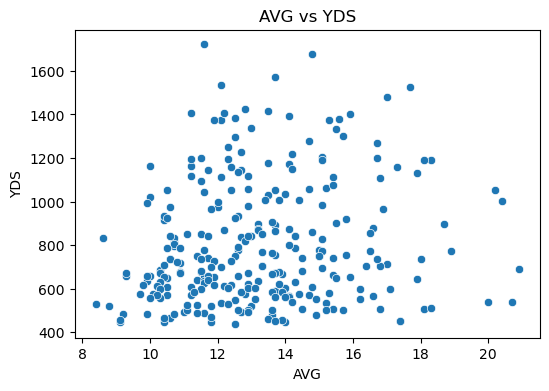

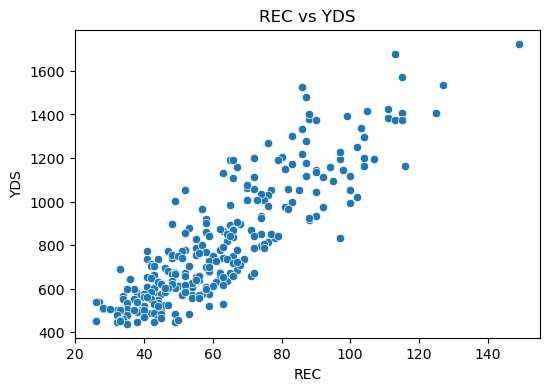

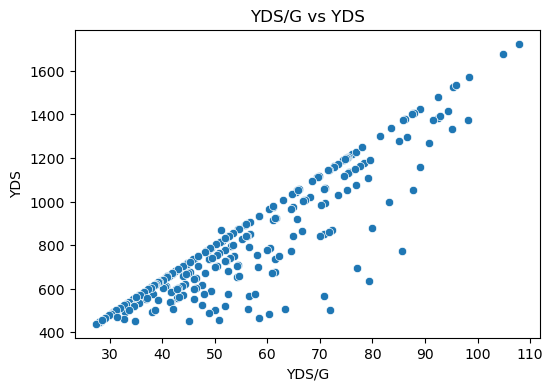

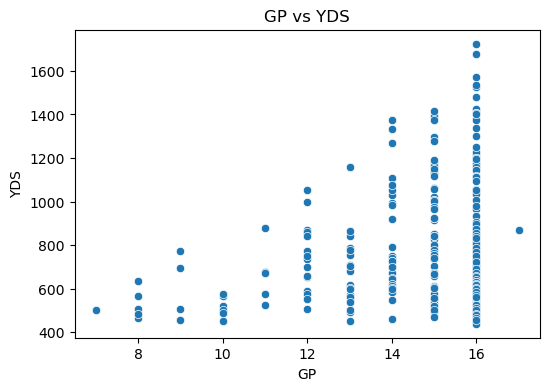

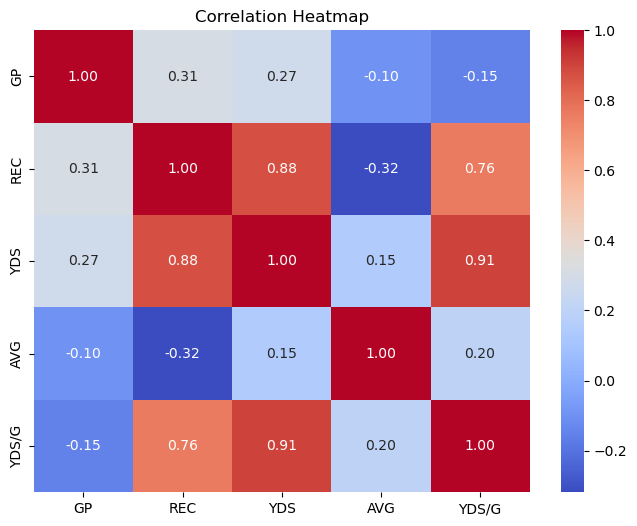

In [45]:
#Visualizations

#visualize the correlation between each independent variable and the dependent variable via scatterplots
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=train_data, x=feature, y=target)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()
    


#visualize correlation between each independent variable and the dependent variable via correlation heatmap
numeric_columns = train_data.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = train_data[numeric_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [46]:
# Extract features and target variable to apply the algorithms

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

In [47]:
#Algorithm 1 -> Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#evaluate the model using test data
lin_reg_predictions = lin_reg.predict(X_test)

#Print Evaluations
print('Linear Regression Evaluation:')
print('Mean Squared Error:', mean_squared_error(y_test, lin_reg_predictions))
print('R-squared:', r2_score(y_test, lin_reg_predictions))

#Predict the top 10 Receivers (most receiving yards) for 2021
test_data['LinReg_YDS_Pred'] = lin_reg.predict(X_test)

#Set the indexes
top_10_lin_reg = test_data.nlargest(10, 'LinReg_YDS_Pred')[['NAME', 'POS', 'YDS', 'LinReg_YDS_Pred']].reset_index(drop=True)

#Add 1 so index starts from 1 and not 0
top_10_lin_reg.index = top_10_lin_reg.index + 1

top_10_lin_reg['LinReg_YDS_Pred'] = top_10_lin_reg['LinReg_YDS_Pred'].apply(lambda x: f"{x:.2f}")

#Print the Predictions 
print('\nTop 10 Receivers in 2021 predicted by Linear Regression:')
print(top_10_lin_reg)

Linear Regression Evaluation:
Mean Squared Error: 926.0748016600495
R-squared: 0.9895397703962564

Top 10 Receivers in 2021 predicted by Linear Regression:
                   NAME POS   YDS LinReg_YDS_Pred
1        Cooper KuppLAR  WR  1947         1863.28
2   Justin JeffersonMIN  WR  1616         1542.36
3       Davante AdamsGB  WR  1553         1535.59
4      Ja'Marr ChaseCIN  WR  1455         1386.17
5        Deebo SamuelSF  WR  1405         1355.55
6       Mark AndrewsBAL  TE  1361         1335.42
7         Tyreek HillKC  WR  1239         1245.11
8       Stefon DiggsBUF  WR  1225         1219.64
9    Diontae JohnsonPIT  WR  1161         1179.00
10      Keenan AllenLAC  WR  1138         1155.84


In [48]:
#Algorithm 2 -> Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)  # You can modify n_estimators as needed
rf_reg.fit(X_train, y_train)

#evaluate the model using test data
rf_reg_predictions = rf_reg.predict(X_test)

#Print Evaluations
print('\nRandom Forest Regression Evaluation:')
print('Mean Squared Error:', mean_squared_error(y_test, rf_reg_predictions))
print('R-squared:', r2_score(y_test, rf_reg_predictions))

#Predict the top 10 Receivers (most receiving yards) for 2021
test_data['RFR_YDS_Pred'] = rf_reg.predict(X_test)

#Set the indexes
top_10_rf_reg = test_data.nlargest(10, 'RFR_YDS_Pred')[['NAME','POS', 'YDS', 'RFR_YDS_Pred']].reset_index(drop=True)

#Add 1 so index starts from 1 and not 0
top_10_rf_reg.index = top_10_rf_reg.index + 1

top_10_rf_reg['RFR_YDS_Pred'] = top_10_rf_reg['RFR_YDS_Pred'].apply(lambda x: f"{x:.2f}")

#Print the Predictions 
print('\nTop 10 Receivers in 2021 predicted by Random Forest Regression:')
print(top_10_rf_reg)


Random Forest Regression Evaluation:
Mean Squared Error: 3139.4521821052645
R-squared: 0.9645391596921457

Top 10 Receivers in 2021 predicted by Random Forest Regression:
                   NAME POS   YDS RFR_YDS_Pred
1        Cooper KuppLAR  WR  1947      1662.85
2       Davante AdamsGB  WR  1553      1482.09
3   Justin JeffersonMIN  WR  1616      1431.95
4        Deebo SamuelSF  WR  1405      1325.57
5      Ja'Marr ChaseCIN  WR  1455      1311.97
6       Mark AndrewsBAL  TE  1361      1246.60
7      Tyler LockettSEA  WR  1175      1167.20
8         Tyreek HillKC  WR  1239      1164.05
9    Diontae JohnsonPIT  WR  1161      1163.63
10      Stefon DiggsBUF  WR  1225      1148.73


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=89f345ef-6ecc-48e2-9629-9686bce089fe' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>